<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/HR_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [47]:
import warnings

warnings.filterwarnings('ignore')

input

In [48]:
df = pd.read_csv("Algo.csv")

exploratory

In [49]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Knowledge        88 non-null     int64  
 1   Problem Solving  88 non-null     int64  
 2   Interaction      88 non-null     int64  
 3   Impact           54 non-null     float64
 4   Accountability   88 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.6 KB


In [50]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,52,15,27,30.0,0
1,52,15,27,30.0,0
2,52,15,27,30.0,0
3,52,20,36,30.0,0
4,52,20,27,30.0,0


checks

In [51]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,88.000000,88.000000,88.000000,54.000000,88.000000
mean,87.227273,40.806818,35.852273,107.425926,0.238636
std,40.383144,28.712150,9.379042,60.700503,2.238608
min,52.000000,15.000000,27.000000,30.000000,0.000000
25%,52.000000,20.000000,27.000000,57.250000,0.000000
50%,75.000000,27.000000,36.000000,90.000000,0.000000
75%,103.000000,65.000000,36.000000,182.000000,0.000000
max,219.000000,150.000000,66.000000,197.000000,21.000000


In [52]:
X=df

Scaling

In [53]:
cols = X.columns

In [54]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [55]:
X = pd.DataFrame(X, columns=[cols])

In [56]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.037037,0.230769,0.0,0.0
4,0.0,0.037037,0.000000,0.0,0.0


In [69]:
X.dropna(inplace=True)
X.shape

(54, 5)

K means

In [58]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [59]:
kmeans.cluster_centers_

array([[6.83339204e-02, 4.48801743e-02, 1.46304676e-01, 2.09404720e-01,
        1.38777878e-17],
       [5.32934132e-01, 4.63333333e-01, 4.55128205e-01, 8.95808383e-01,
        5.00000000e-02]])

inertia

In [60]:
kmeans.inertia_

7.581352838404716

Elbow

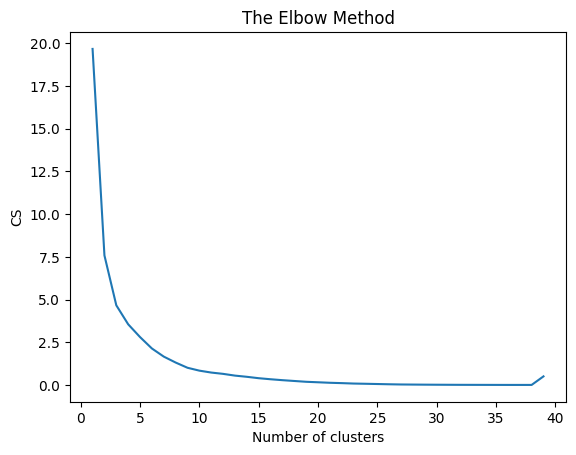

In [61]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

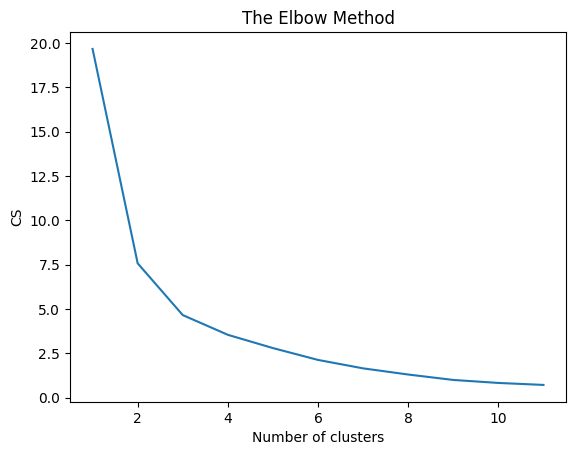

In [62]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [75]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('algo_hr_l.csv')
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 1 1 2 2 2 1]


In [76]:
Z=kmeans.cluster_centers_
Z

array([[6.83339204e-02, 4.48801743e-02, 1.46304676e-01, 2.09404720e-01,
        1.38777878e-17],
       [8.78528657e-01, 5.42857143e-01, 8.13186813e-01, 8.03250642e-01,
        1.42857143e-01],
       [3.46844772e-01, 4.20512821e-01, 2.62327416e-01, 9.45647167e-01,
        0.00000000e+00]])

In [77]:
import matplotlib

In [78]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 53 nearest neighbors...
[t-SNE] Indexed 54 samples in 0.000s...
[t-SNE] Computed neighbors for 54 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 54 / 54
[t-SNE] Mean sigma: 0.685297
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.043503
[t-SNE] KL divergence after 2500 iterations: -0.189685


In [79]:
np.unique(labels)


array([0, 1, 2], dtype=int32)

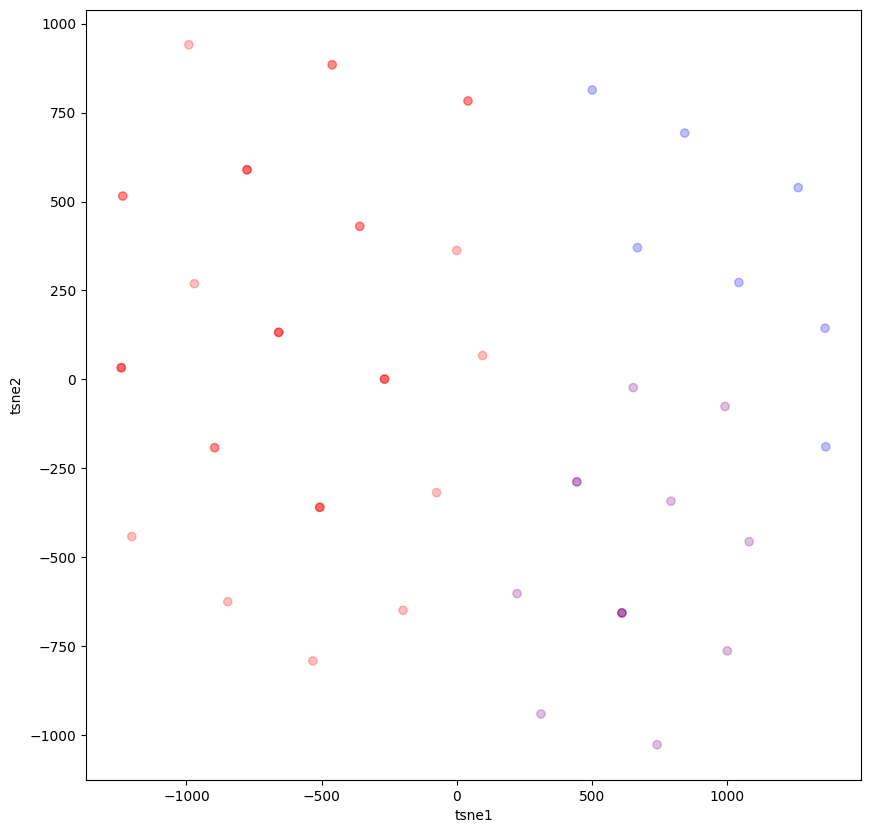

In [80]:
colors = ["red","green","blue","purple"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [81]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_hr_algo.csv')
Z2

array([[6.34117647e+01, 2.10588235e+01, 3.27058824e+01, 6.49705882e+01,
        2.91433544e-16],
       [1.98714286e+02, 8.82857143e+01, 5.87142857e+01, 1.64142857e+02,
        3.00000000e+00],
       [1.09923077e+02, 7.17692308e+01, 3.72307692e+01, 1.87923077e+02,
        0.00000000e+00]])